Title : Analysis On Indian Startup Ecosystem From 2018-2021

Business Objective: 
The objective for this project is to analyze the funding data of Indian start-ups from the years 2018 to 2021 to gain a deep understanding of the financial landscape within the Indian start-up ecosystem. The primary focus is to identify the sectors or industries that have consistently demonstrated significant growth potential and attractiveness for investments. This analysis will serve as the foundation for making strategic decisions regarding entry or expansion into the Indian start-up ecosystem, ensuring that resources are directed towards the most promising areas that offer the best prospects for success and return on investment.

Notebook Overview
- This notebook is a step by step guide to begin practicing analysis of data

Importation Of All Libraries, needed for this analysis 

In [6]:
# import all necessary libraries

import pyodbc
from dotenv import dotenv_values
import pandas as pd
import warnings
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
warnings.filterwarnings('ignore')

Establishing A Connection To SQL Server

In [7]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

In [8]:
# Get the values for the credentials you set in the '.env' file

server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
database = environment_variables.get("DATABASE")

In [9]:


connection_string = "DRIVER={SQL Server};SERVER=dap-projects-database.database.windows.net;DATABASE=dapDB;UID=LP1_learner;PWD=Hyp0th3s!$T3$t!ng"

In [10]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

Data Loading From Various Sources

In [11]:
# load dataset
data_2018 = pd.read_csv('startup_funding2018.csv')
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [12]:
# checking for the data info
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [13]:
# checking for the data shape
data_2018.shape

(526, 6)

In [14]:
# load data for 2019
data_2019 = pd.read_csv('startup_funding2019.csv')
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [15]:
#check data info, to get to know what the data holds 
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [16]:
# check for data shape
data_2019.shape

(89, 9)

In [17]:
# load data from the sql sever
query = ('SELECT * FROM dbo.LP1_startup_funding2020')
data_2020 = pd.read_sql(query, connection)

In [18]:
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [19]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [20]:
data_2020.shape

(1055, 10)

In [21]:
# load data from server 
query = (' SELECT * FROM dbo.LP1_startup_funding2021')
data_2021 = pd.read_sql(query, connection)
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [22]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [23]:
# check data info for  2021
data_2021.shape

(1209, 9)

#Hypotheses And Analytical questioning

Hypotheses: Comprehensive Analysis of the Dynamics in Startup Funding: 

Null Hypothesis (H0):
There is no significant change or variation in the overall startup funding landscape, encompassing total funding amounts, distribution across investment stages, annual trends in the number of startups funded, the most-funded sectors, and the average funding received in the top ten sectors.

Alternative Hypothesis (H1):
Significant changes or variations exist in the overall startup funding landscape, involving shifts in total funding amounts, diverse distributions across investment stages, noticeable annual trends in the number of startups funded, variations in the sectors receiving the most funding, and differences in the average funding received in the top ten sectors.

Questions:
1.	How has the total funding changed over the years?
2. Which company received the highest amount of funds?
3. Illustrate the annual trend in the number of startups funded over the years 
4. Which sectors received the most funding?
5. What is the average amount of funding received in top ten sectors?



#Exploratory Data Analysis (EDA)
-This section is dedicated to thoroughly examining the datasets, presenting findings, formulating hypotheses, and considering the steps for cleaning, processing, and creating features.

Cleaning 2018 data

In [24]:
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [25]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [26]:
# Keeping the initial word preceding the comma in the industry column
data_2018['Industry'] = data_2018['Industry'].apply(str)
data_2018['Industry'] = data_2018['Industry'].str.split(',').str[0]
data_2018['Industry'] = data_2018['Industry'].replace("'","",regex=True)

In [27]:
data_2018['Industry']

0             Brand Marketing
1                 Agriculture
2                      Credit
3          Financial Services
4        E-Commerce Platforms
                ...          
521                       B2B
522                   Tourism
523         Food and Beverage
524    Information Technology
525             Biotechnology
Name: Industry, Length: 526, dtype: object

In [28]:
# Keeping the initial word preceing the comma in the location column
data_2018['Location'] = data_2018['Location'].apply(str)
data_2018['Location'] = data_2018['Location'].str.split(',').str[0]
data_2018['Location'] = data_2018['Location'].replace("'","",regex=True)

In [29]:
data_2018['Location']

0      Bangalore
1         Mumbai
2        Gurgaon
3          Noida
4      Hyderabad
         ...    
521    Bangalore
522      Haryana
523       Mumbai
524       Mumbai
525      Chennai
Name: Location, Length: 526, dtype: object

In [30]:
data_2018['Amount']

0           250000
1      ₹40,000,000
2      ₹65,000,000
3          2000000
4                —
          ...     
521      225000000
522              —
523           7500
524    ₹35,000,000
525       35000000
Name: Amount, Length: 526, dtype: object

In [31]:
# Refining the Amounts Column
## Eliminating commas and dashes from the Amounts
data_2018['Amount'] = data_2018['Amount'].apply(str)
data_2018['Amount'].replace(",", "", inplace = True, regex=True)
data_2018['Amount'].replace("—", 0, inplace = True, regex=True)
data_2018['Amount'].replace("$", "", inplace = True, regex=True)

In [32]:
## Creating temporary columns to help with the conversion of INR to USD
data_2018['INR Amount'] = data_2018['Amount'].str.rsplit('₹', n = 2).str[1]
data_2018['INR Amount'] = data_2018['INR Amount'].apply(float).fillna(0)
data_2018['USD Amount'] = data_2018['INR Amount'] * 0.012
data_2018['USD Amount'] = data_2018['USD Amount'].replace(0, np.nan)
data_2018['USD Amount'] = data_2018['USD Amount'].fillna(data_2018['Amount'])
data_2018['USD Amount'] = data_2018['USD Amount'].replace("$", "", regex=True)
data_2018["Amount"] = data_2018["USD Amount"]
data_2018["Amount"] = data_2018["Amount"].apply(lambda x: float(str(x).replace("$","")))
data_2018["Amount"] = data_2018["Amount"].replace(0, np.nan)

In [33]:
# Dropping the temporary columns
data_2018.drop(columns = ["INR Amount", "USD Amount"], inplace = True)

In [34]:
data_2018 = data_2018.rename(columns =  {'Company Name':'Company/Brand', 'Industry':'Sector', 'Location':'HeadQuarter','Round/Series':'Stage', 'About Company':'What it does','Amount':'Amount($)'} )

In [35]:
## checking out the results
data_2018

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,Agriculture,Seed,480000.0,Mumbai,A startup which aggregates milk from dairy far...
2,MyLoanCare,Credit,Series A,780000.0,Gurgaon,Leading Online Loans Marketplace in India
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000.0,Bangalore,"Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,Tourism,Series A,NaN,Haryana,HappyEasyGo is an online travel domain.
523,Mombay,Food and Beverage,Seed,7500.0,Mumbai,Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,420000.0,Mumbai,Droni Tech manufacture UAVs and develop softwa...


In [36]:
#Examining the Stage Column
data_2018['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [37]:
data_2018['Stage']=data_2018['Stage'].replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',np.nan)

In [38]:
data_2018['Stage']=data_2018['Stage'].replace('Undisclosed',np.nan)

In [39]:
data_2018['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', nan, 'Series D', 'Secondary Market',
       'Post-IPO Equity', 'Non-equity Assistance', 'Funding Round'],
      dtype=object)

In [40]:
data_2018[data_2018['Stage']=='Venture - Series Unknown']

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does
94,Rays Power Infra,Energy,Venture - Series Unknown,24000000.0,Jaipur,Rays Power Infra is a leading integrated Solar...
106,Vivriti Capital,Financial Services,Venture - Series Unknown,28500000.0,Chennai,Vivriti Capital is an online platform for inst...
118,SEDEMAC Mechatronics,Automotive,Venture - Series Unknown,NaN,Mumbai,SEDEMAC Mechatronics is technology company tha...
119,MadGuy Labs,E-Learning,Venture - Series Unknown,150000.0,Hyderabad,MadGuy Labs is a Online Test-prep Platform.
131,Wakefit,Manufacturing,Venture - Series Unknown,7800000.0,Bangalore,Wakefitkart is a mattress manufacturing compan...
132,Hero Electric,Manufacturing,Venture - Series Unknown,19200000.0,New Delhi,"Hero Electric, a 100% subsidiary of the Hero G..."
138,Wow Venue,Events,Venture - Series Unknown,1500000.0,Mumbai,Wow Venue is an online platform.
143,MyNewCar.in,Automotive,Venture - Series Unknown,1000000.0,Gurgaon,MyNewCar.in offers new cars at best price with...
152,Shopkirana,E-Commerce,Venture - Series Unknown,2000000.0,Indore,Shopkirana connects brands and traditional ret...
153,Fric Bergen,—,Venture - Series Unknown,NaN,Alwar,Fric Bergen is a leader in the specialty food ...


In [41]:
data_2018['Stage']=data_2018['Stage'].replace('Venture - Series Unknown',np.nan)

In [42]:
#sector
data_2018['Sector'].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       '—', 'Sports', 'Big Data', 'Cloud Computing', 'Food Processing',
       'Trading Platform', 'Consumer Goods', 'Wellness', 'Fashion',
       'Consulting', 'Biotechnology', 'Communities', 'Consumer',
       'Consumer Applications', 'Mobile',

In [43]:
data_2018['Sector']= data_2018['Sector'].replace('—',np.nan)

In [44]:
#Headquarters
data_2018['HeadQuarter'].unique()


array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow'],
      dtype=object)

In [45]:
data_2018['Funding Year']=2018
data_2018

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,480000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,780000.0,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000.0,Bangalore,"Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,Tourism,Series A,NaN,Haryana,HappyEasyGo is an online travel domain.,2018
523,Mombay,Food and Beverage,Seed,7500.0,Mumbai,Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,420000.0,Mumbai,Droni Tech manufacture UAVs and develop softwa...,2018


#Cleaning Data For 2019

In [46]:
data_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


# Examine each column

In [47]:

#founded
data_2019['Founded'].unique()

array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008.])

In [48]:
#headquarters
data_2019['HeadQuarter'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [49]:
#sector
data_2019['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [50]:
data_2019['Amount($)'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [51]:
#Eliminating commas and dashes from the Amounts
data_2019["Amount($)"] = data_2019["Amount($)"].apply(str)
data_2019["Amount($)"].replace(",","", inplace = True, regex=True)
data_2019["Amount($)"].replace("Undisclosed", np.nan, inplace = True, regex=True)
data_2019["Amount($)"] = data_2019["Amount($)"].apply(lambda x: float(str(x).replace("$","")))
data_2019["Founded"].replace("nan", np.nan, inplace = True, regex=True)
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN


In [52]:
data_2019['Funding Year']=2019
data_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019
...,...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...",20000000.0,Series A,2019
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...",693000000.0,NaN,2019
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,5000000.0,Series B,2019
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...",50000000.0,NaN,2019


#Cleaning Data For 2020

In [53]:
#Examine each column then and fix errors in data set
#Drop column 10, because it is not needed for our analysis since it empty
data_2020['column10'].unique()

array([None, 'Pre-Seed', 'Seed Round'], dtype=object)

In [54]:
data_2020=data_2020.drop('column10', axis=1)

In [55]:
#founded column
data_2020['Founded'].unique()

array([2019., 2018., 2020., 2016., 2008., 2015., 2017., 2014., 1998.,
       2007., 2011., 1982., 2013., 2009., 2012., 1995., 2010., 2006.,
       1978.,   nan, 1999., 1994., 2005., 1973., 2002., 2004., 2001.])

In [56]:
#replace '-' with NaN
data_2020["Founded"].replace("-", np.nan, inplace = True, regex=True)

In [57]:
#headquarters
data_2020['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [58]:
# maintain first words using slipt by comma
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].apply(str)
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].str.split(',').str[0]
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].replace("'","",regex=True)

In [59]:
#Amount column
data_2020['Amount'].unique()

array([2.0000000e+05, 1.0000000e+05,           nan, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 3.0000000e+06,
       1.0000000e+07, 1.4500000e+08, 1.0000000e+08, 2.1000000e+07,
       4.0000000e+06, 2.0000000e+07, 5.6000000e+05, 2.7500000e+05,
       4.5000000e+06, 1.5000000e+07, 3.9000000e+08, 7.0000000e+06,
       5.1000000e+06, 7.0000000e+08, 2.3000000e+06, 7.0000000e+05,
       1.9000000e+07, 9.0000000e+06, 4.0000000e+07, 7.5000000e+05,
       1.5000000e+06, 7.8000000e+06, 5.0000000e+07, 8.0000000e+07,
       3.0000000e+07, 1.7000000e+06, 2.5000000e+06, 4.0000000e+04,
       3.3000000e+07, 3.5000000e+07, 3.0000000e+05, 2.5000000e+07,
       3.5000000e+06, 2.0000000e+08, 6.0000000e+06, 1.3000000e+06,
       4.1000000e+06, 5.7500000e+05, 8.0000000e+05, 2.8000000e+07,
       1.8000000e+07, 3.2000000e+06, 9.0000000e+05, 2.5000000e

In [60]:
# renaming the Amount column to "Amount($)
data_2020= data_2020.rename(columns={'Amount': 'Amount($)'})

In [61]:
data_2020["Amount($)"].astype("float")

0         200000.0
1         100000.0
2              NaN
3         400000.0
4         340000.0
           ...    
1050     1500000.0
1051    13200000.0
1052     8000000.0
1053     8043000.0
1054     9000000.0
Name: Amount($), Length: 1055, dtype: float64

In [62]:
data_2020['Funding Year']=2020
data_2020

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,2020
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,2020
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,2020
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,2020


# Cleaning Data For 2021

In [63]:
# examine each column and fix the errors in it
#Put data to their right column

data_2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [64]:
#headquarters
data_2021['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technol

In [65]:
#correcting data
data_2021['HeadQuarter'].replace('Gurugram\t#REF!','Gurugram',inplace =True, regex=True)

In [66]:
data_2021[data_2021['HeadQuarter']=='Online Media\t#REF!']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1100,Sochcast,2020.0,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,None,None


In [67]:
data_2021.loc[data_2021["HeadQuarter"] == 'Pharmaceuticals\t#REF!']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None
256,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None


In [68]:
#sector
data_2021['Sector'].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [69]:
data_2021.loc[data_2021["Sector"] == 'Hauz Khas']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
241,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
255,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed


In [70]:
data_2021.loc[data_2021["Company_Brand"] == "MasterChow", ["HeadQuarter", "Sector"]] = ["Hauz Khas", "Food & Beverages"]
data_2021.loc[data_2021["Company_Brand"] == "MasterChow"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
241,MasterChow,2020.0,Hauz Khas,Food & Beverages,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
255,MasterChow,2020.0,Hauz Khas,Food & Beverages,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed


In [71]:
data_2021.drop([255], axis = 0, inplace = True)

In [72]:
#'Manchester, Greater Manchester'
data_2021.loc[data_2021["Company_Brand"] == "Peak", ["HeadQuarter", "Sector"]] = ["Manchester", "Information Technology & Services"]
data_2021.loc[data_2021["Company_Brand"] == "Peak"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1176,Peak,2014.0,Manchester,Information Technology & Services,Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,$75000000,Series C


In [73]:
data_2021.loc[data_2021["Sector"] == 'Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1100,Sochcast,2020.0,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,None,None


In [74]:
data_2021.loc[data_2021["Company_Brand"] == "Sochcast", ["HeadQuarter", "Sector",'What it does','Founders','Investor']] = [np.nan, 'Online Media','Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience','CA Harvinderjit Singh Bhatia, Garima Surana','Vinners, Raj Nayak, Amritaanshu Agrawal']
data_2021.loc[data_2021["Company_Brand"] == "Sochcast"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,What it does
1100,Sochcast,2020.0,NaN,Online Media,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","CA Harvinderjit Singh Bhatia, Garima Surana","Vinners, Raj Nayak, Amritaanshu Agrawal",None,None,Sochcast is an Audio experiences company that ...


In [75]:
data_2021.loc[data_2021["Sector"] == "MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India."]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,What it does
257,MoEVing,2021.0,Gurugram,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,None,NaN


In [76]:
data_2021.loc[data_2021["Sector"] == "MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India."]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,What it does
257,MoEVing,2021.0,Gurugram,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,None,NaN


In [77]:
data_2021.loc[data_2021["Sector"] == 'Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,What it does
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None,NaN
256,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None,NaN


In [78]:
data_2021.loc[data_2021["Company_Brand"] == "Fullife Healthcare", ['HeadQuarter',"Sector",'What it does','Founders','Investor','Amount($)','Stage']] = [
    np.nan,'Pharmaceuticals',
    'Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.',
    'Varun Khanna',
    'Morgan Stanley Private Equity Asia','$22000000','Series C']
data_2021.loc[data_2021["Company_Brand"] == "Fullife Healthcare"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,What it does,Amount($)
242,Fullife Healthcare,2009.0,NaN,Pharmaceuticals,Varun Khanna,Varun Khanna,Morgan Stanley Private Equity Asia,Series C,Series C,Primary Business is Development and Manufactur...,$22000000
256,Fullife Healthcare,2009.0,NaN,Pharmaceuticals,Varun Khanna,Varun Khanna,Morgan Stanley Private Equity Asia,Series C,Series C,Primary Business is Development and Manufactur...,$22000000


In [79]:
data_2021.drop([256], axis = 0, inplace = True)

In [80]:
data_2021['Sector'].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [81]:
#amount
#Code to drop $ sign, replace 'Undisclosed' with Nan, and removing the ','s

data_2021['Amount'] = data_2021['Amount'].replace('[\$,]', '', regex=True).replace(['Pre-series A','Undisclosed','Upsparks','J0','undisclosed','ah! Ventures','ITO Angel Network LetsVenture', 'LetsVenture','JITO Angel Network','Series C','Seed',' None'],0, regex=True).replace('', np.nan , regex=True)

In [82]:
data_2021['Amount'].astype(float)

0         1200000.0
1       120000000.0
2        30000000.0
3        51000000.0
4         2000000.0
           ...     
1204      3000000.0
1205     20000000.0
1206     55000000.0
1207     26000000.0
1208      8000000.0
Name: Amount, Length: 1207, dtype: float64

In [83]:
#Drop all Null values on the column amount
data_2021.dropna(subset=['Amount'], inplace=True)

In [84]:
column_mapping_2021= {'Company_Brand': 'Company_Name', 'Amount': 'Amount($)'}

# Rename multiple columns using the rename() method
data_2021.rename(columns=column_mapping_2021, inplace=True)

In [85]:
column_mapping_2020 = {'Company_Brand': 'Company_Name', 'Amount': 'Amount($)'}

# Rename multiple columns using the rename() method
data_2020.rename(columns=column_mapping_2020, inplace=True)

In [86]:
column_mapping_2019 = {'Company/Brand': 'Company_Name'}

# Rename multiple columns using the rename() method
data_2019.rename(columns=column_mapping_2019, inplace=True)

In [87]:
column_mapping_2018 = {'Company/Brand': 'Company_Name', 'Industry': 'Sector', 'Round/Series':'Series', 'Location':'HeadQuarter'}

# Rename multiple columns using the rename() method
data_2018.rename(columns=column_mapping_2018, inplace=True)

In [88]:
data_2018.head()

,Company_Name,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,480000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,780000.0,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018


In [89]:
data_2019.head()

,Company_Name,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019


In [90]:
data_2020.head()

,Company_Name,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020


In [91]:
data_2021.head()

,Company_Name,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,What it does,Amount($)
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A,NaN,NaN
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,None,NaN,NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D,NaN,NaN
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C,NaN,NaN
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed,NaN,NaN


In [92]:
# Drop the last two columns
data_2021 = data_2021.iloc[:, :-2]

In [93]:
data_2021.head()

,Company_Name,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed


In [94]:
column_mapping_2020 = {'What_it_does': 'What it does'}

# Rename multiple columns using the rename() method
data_2020.rename(columns=column_mapping_2020, inplace=True)

In [95]:
column_mapping_2021 = {'What_it_does': 'What it does'}

# Rename multiple columns using the rename() method
data_2021.rename(columns=column_mapping_2021, inplace=True)

In [96]:
data_2021['Funding Year']=2021
data_2021

,Company_Name,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed,2021
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000,Pre-series A,2021
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000,Series D,2021
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000,Series C,2021
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000,Series B,2021


#Concatenating the dataset from 2018 to 2021

In [97]:
#combining data into one 
sets=[data_2018,data_2019,data_2020, data_2021]
startup_data = pd.concat(sets)

In [98]:
startup_data.head()

,Company_Name,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,480000.0,Mumbai,A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN
2,MyLoanCare,Credit,Series A,780000.0,Gurgaon,Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN


In [99]:
startup_data["Amount($)"].astype("float")

0         250000.0
1         480000.0
2         780000.0
3        2000000.0
4              NaN
           ...    
1204     3000000.0
1205    20000000.0
1206    55000000.0
1207    26000000.0
1208     8000000.0
Name: Amount($), Length: 2872, dtype: float64

In [100]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2872 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  2872 non-null   object 
 1   Sector        2824 non-null   object 
 2   Stage         1899 non-null   object 
 3   Amount($)     2458 non-null   object 
 4   HeadQuarter   2851 non-null   object 
 5   What it does  2872 non-null   object 
 6   Funding Year  2872 non-null   int64  
 7   Founded       2103 non-null   float64
 8   Founders      2327 non-null   object 
 9   Investor      2246 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 246.8+ KB


In [101]:
startup_data.describe()

,Funding Year,Founded
count,2872.000000,2103.000000
mean,2020.021240,2016.073229
std,1.087227,4.368532
min,2018.000000,1963.000000
25%,2020.000000,2015.000000
50%,2020.000000,2017.000000
75%,2021.000000,2019.000000
max,2021.000000,2021.000000


# Processing Of Features

In [102]:
#Here is the section to clean and process the features of the dataset.
startup_data.isnull().sum()

Company_Name      0
Sector           48
Stage           973
Amount($)       414
HeadQuarter      21
What it does      0
Funding Year      0
Founded         769
Founders        545
Investor        626
dtype: int64

In [103]:
startup_data['Founded'].unique()

array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008., 2020., 1998., 2007., 1982., 2009.,
       1995., 2006., 1978., 1999., 1994., 2005., 1973., 2002., 2001.,
       2021., 1993., 1989., 2000., 2003., 1991., 1984., 1963.])

In [104]:
startup_data['Founded']=startup_data['Founded'].replace(np.nan,0)

In [105]:
startup_data['Founded']=startup_data['Founded'].astype(int)

In [106]:
startup_data['Founded']=startup_data['Founded'].replace(0,'N/A')

In [107]:
#updating the columns 
startup_data.update(startup_data[['HeadQuarter','Sector','What it does', 'Founders', 'Investor','Stage']].fillna('N/A'))

In [108]:
startup_data[startup_data['Amount($)'].isnull()]

,Company_Name,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,N/A,N/A,N/A
8,Freightwalla,Information Services,Seed,NaN,Mumbai,Freightwalla is an international forwarder tha...,2018,N/A,N/A,N/A
9,Microchip Payments,Mobile Payments,Seed,NaN,Bangalore,Microchip payments is a mobile-based payment a...,2018,N/A,N/A,N/A
10,BizCrum Infotech Pvt. Ltd.,B2B,Seed,NaN,Delhi,Building Transactionary B2B Marketplaces,2018,N/A,N/A,N/A
11,Emojifi,Internet,Seed,NaN,Bengaluru,"Emojifi is an app that provides live emoji, st...",2018,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...
1023,Skilancer,Technology,N/A,NaN,Noida,Solar module cleaning system [MCS] providers,2020,N/A,Neeraj Kumar,Venture Catalysts
1024,Harappa Education,Edtech,N/A,NaN,New Delhi,Provides online courses on foundational skills,2020,N/A,Pramath Raj Sinha,James Murdoch-led Lupa Systems
1028,PayMart,Fintech,N/A,NaN,Chandigarh,Provides cardless cash withdrawals through sma...,2020,2015,Amit Narang,"IIM Ahmedabad’s incubator (CIIE.CO),Chandigarh..."
1040,BuildPan,SaaS,Seed Round,NaN,Indore,"It helps developers to test, integrate and dep...",2020,2019,"Sonal Khandelwal, Vaibhav Tiwari","HNIs in India, Japan, and the US"


In [109]:
#startup_data['Amount($)']=startup_data['Amount($)'].replace('$6000000',6000000)

In [110]:
startup_data['Amount($)']=startup_data['Amount($)'].astype(float)

In [111]:
startup_data['Funding Year']=startup_data['Funding Year'].astype(str)

In [112]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2872 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  2872 non-null   object 
 1   Sector        2872 non-null   object 
 2   Stage         2872 non-null   object 
 3   Amount($)     2458 non-null   float64
 4   HeadQuarter   2872 non-null   object 
 5   What it does  2872 non-null   object 
 6   Funding Year  2872 non-null   object 
 7   Founded       2872 non-null   object 
 8   Founders      2872 non-null   object 
 9   Investor      2872 non-null   object 
dtypes: float64(1), object(9)
memory usage: 246.8+ KB


In [113]:
startup_data['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow', 'N/A',
       'Telangana', 'Gurugram', 'Surat', 'Uttar pradesh', 'Rajasthan',
       'Tirunelveli', 'None', 'Singapore', 'Gujarat', 'Kerala', 'Frisco',
       'California', 'Dhingsara', 'New York', 'Patna', 'San Francisco',
       'San Ramon', 'Paris', 'Plano', 'Sydney', 'San Francisco Bay Area',
       'Bangaldesh', 'London', 'Milano', 'Palmwoods', 'France',
       'Samastipu

In [114]:
startup_data[startup_data['HeadQuarter']=='nan']

,Company_Name,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor


In [115]:
startup_data['HeadQuarter']=startup_data['HeadQuarter'].replace('nan','N/A')

In [116]:
startup_data['Sector'].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       'N/A', 'Sports', 'Big Data', 'Cloud Computing', 'Food Processing',
       'Trading Platform', 'Consumer Goods', 'Wellness', 'Fashion',
       'Consulting', 'Biotechnology', 'Communities', 'Consumer',
       'Consumer Applications', 'Mobile

In [117]:
startup_data['Sector']=startup_data['Sector'].replace('Edtech','EdTech')

In [118]:
pd.set_option('display.float_format','{:.2f}'.format)

##Univariate Analysis

Univariate Analysis involves the examination of one variable at a time. This analysis typically includes calculating statistical metrics and generating charts using methods such as the pandas DataFrame's .describe() and various plotting libraries like Seaborn, Matplotlib, Plotly, etc.

# Answering Reseach Questions

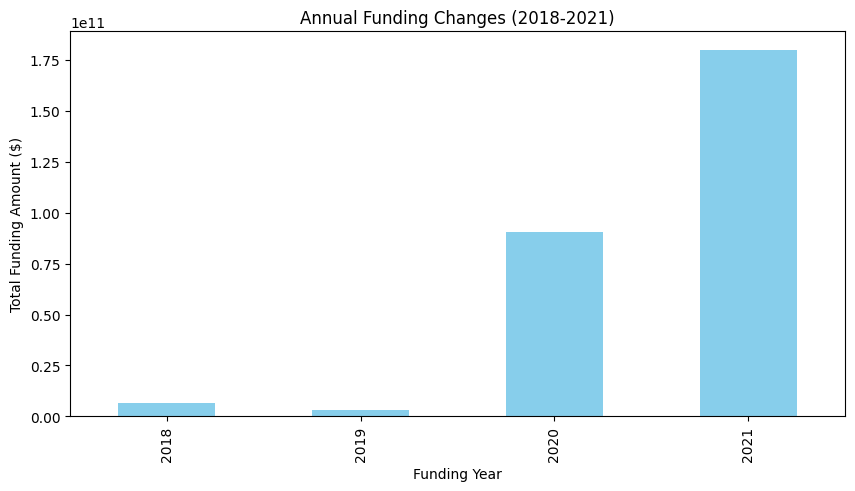

In [127]:
# Question 1; How has the total funding changed over the years?

import matplotlib.pyplot as plt

# Group by "Unique_ID" and sum the "Amount" for each year
sum_by_year = startup_data.groupby('Funding Year')['Amount($)'].sum()

# Bar chart
plt.figure(figsize=(10, 5))
sum_by_year.plot(kind='bar', color='skyblue')
plt.xlabel('Funding Year')
plt.ylabel('Total Funding Amount ($)')
plt.title('Annual Funding Changes (2018-2021)')
plt.show()



In [128]:
print(sum_by_year)

Funding Year
2018     6420760411.00
2019     3336433200.00
2020    90547418604.00
2021   179812951000.00
Name: Amount($), dtype: float64


This code above generates a bar chart illustrating the annual changes in total funding from 2018 to 2021, providing a clear visual representation of how the total funding has evolved over these years. From the chart, 2021 was funded the most.

In [138]:
companies=startup_data.groupby('Company_Name').sum(numeric_only=True).reset_index()

companies.sort_values(['Amount($)'], ascending = False, inplace=True)
companies

,Company_Name,Amount($)
70,Alteria Capital,150000000000.00
1554,Reliance Retail Ventures Ltd,70000000000.00
1724,Snowflake,3000000000.00
1551,Reliance,2200000000.00
1815,Swiggy,1956000000.00
...,...,...
1219,Morning Context,0.00
1781,Stumagz,0.00
1226,My3DSelfie,0.00
1778,Strom Motors,0.00


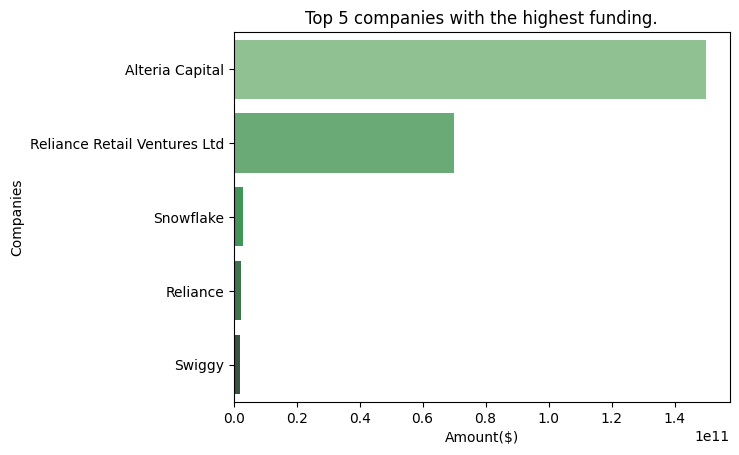

In [137]:
# Question 2; Which company received the highest amount of funds?

import seaborn as sns
import matplotlib.pyplot as plt


top_5_companies=companies.head()
##plt.title('Total Amount($) received funding each year')
ax=sns.barplot(y=top_5_companies['Company_Name'],x=top_5_companies['Amount($)'],palette='Greens_d')
ax.set(xlabel='Amount($)',ylabel='Companies')
plt.title('Top 5 companies with the highest funding.')
plt.show()



From 2018 to 2021, Alteria Capital emerged as the leading recipient of funding in the Indian startup landscape, securing a total investment of $150 billion. In the ranking, Reliance Retail Ventures Ltd followed closely with $70 billion, succeeded by Snowflake with $3 billion, Reliance with $2.2 billion, and Swiggy with $1.956 billion.

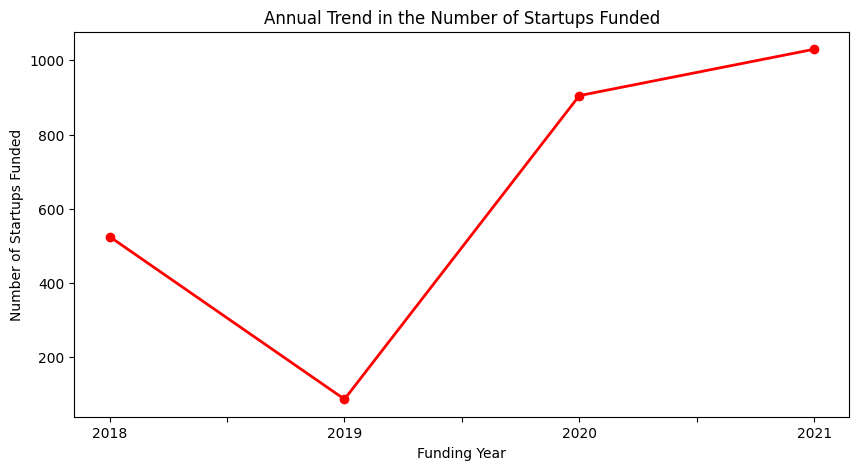

In [140]:
#Question 3; Illustrate the annual trend in the startup funded over the year.

import matplotlib.pyplot as plt

# Remove extra spaces in the column name
startup_data['Funding Year'] = startup_data['Funding Year'].str.strip()

# Group by "Funding Year" and count the unique companies for each year
startup_counts = startup_data.groupby('Funding Year')['Company_Name'].nunique()

# Plot a line graph
plt.figure(figsize=(10, 5))
startup_counts.plot(marker='o', color='red', linestyle='-', linewidth=2)
plt.xlabel('Funding Year')
plt.ylabel('Number of Startups Funded')
plt.title('Annual Trend in the Number of Startups Funded')
plt.show()


In [141]:
year =startup_data.groupby(['Funding Year']).count().reset_index()
year

,Funding Year,Company_Name,Sector,Stage,Amount($),HeadQuarter,What it does,Founded,Founders,Investor
0,2018,526,526,526,378,526,526,526,526,526
1,2019,89,89,89,77,89,89,89,89,89
2,2020,1055,1055,1055,801,1055,1055,1055,1055,1055
3,2021,1202,1202,1202,1202,1202,1202,1202,1202,1202


In 2021, the greatest number of companies, totaling 1,202, secured funding, surpassing 2020 with 1,055 companies and 2018 with 526 companies. Conversely, 2019 marked the year with the fewest companies receiving funding, registering only 89.

In [142]:
# Question 4; Which sector received the most funding?

## Group by industries and sum amounts
industry=startup_data.groupby('Sector').sum(numeric_only=True).reset_index()
industry

,Sector,Amount($)
0,3D Printing,0.00
1,AI,116346500.00
2,AI & Data science,8000000.00
3,AI & Debt,0.00
4,AI & Deep learning,0.00
...,...,...
586,Work fulfillment,500000.00
587,Yoga & wellness,2800000.00
588,eMobility,1000000.00
589,eSports,480000.00


In [143]:
# sort amount in decesnding order
industry.sort_values(['Amount($)'], ascending = False, inplace=True)
#industry['Amount($)']=industry['Amount($)'].apply(lambda x: float('{:.2f}'.format(x)))

In [144]:
## getting the sector that received the mosdt funding using head()
most_funding_industry=industry.head()
most_funding_industry

,Sector,Amount($)
265,FinTech,153863510000.00
480,Retail,70542380000.00
225,EdTech,6379484730.00
536,Tech company,3022700000.00
214,E-commerce,2879052000.00


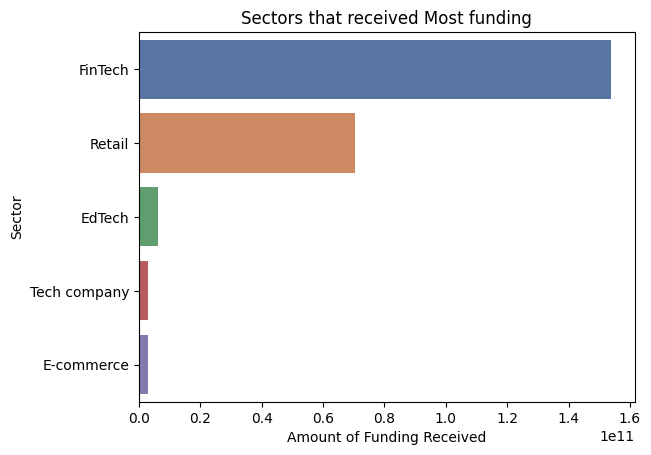

In [149]:
plt.title('Sectors that received Most funding')
sns.barplot(y=most_funding_industry['Sector'],x=most_funding_industry['Amount($)'],palette='deep')
plt.xlabel('Amount of Funding Received')
plt.ylabel('Sector')
plt.show()

 From the above visualization,companies across various sectors secured diverse funding amounts. Leading the chart is FinTech, obtaining a substantial $153.86 billion, succeeded by Retail with $70.54 billion and EdTech with $6.38 billion. Additional industries on the list, such as Tech Company, E-commerce, and the others also received varing levels of funding.

In [150]:
#Question 5; What is the average amount of funding received in top ten sectors?

# avreage o
Average_sector=startup_data.query("Sector==['FinTech','Retail','EdTech','Tech company','E-commerce','Automotive','Multinational conglomerate company','Food Delivery''Hospitality']").groupby(
    'Sector').mean(numeric_only=True).reset_index()

In [152]:
Average_sector.sort_values(['Amount($)'], ascending = False, inplace=True)
Average_sector

,Sector,Amount($)
5,Retail,2821695200.00
4,Multinational conglomerate company,2200000000.00
3,FinTech,921338383.23
6,Tech company,377837500.00
0,Automotive,47994511.32
1,E-commerce,41725391.30
2,EdTech,32715306.31


In [161]:
top_AV_SEC=Average_sector

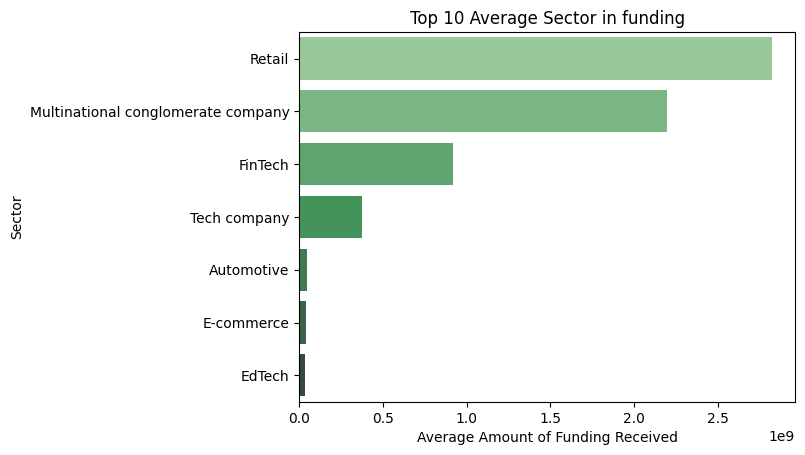

In [163]:

plt.title('Top 10 Average Sector in funding')
sns.barplot(y=top_AV_SEC['Sector'],x=top_AV_SEC['Amount($)'],palette='Greens_d')
plt.xlabel('Average Amount of Funding Received')
plt.ylabel('Sector')
plt.show()

The average funding amounts received by companies in different sectors. The Retail sector had the highest average funding followed by Multinational Conglomerate Company and the other sectors include FinTech, Tech Company, Automotive, E-commerce, and EdTech.

# Hypoyhesis Testing

In [172]:
# Perform ANOVA again
f_stat, p_value_anova = f_oneway(
    startup_data[startup_data['Funding Year'] == 2018]['Amount($)'],
    startup_data[startup_data['Funding Year'] == 2019]['Amount($)'],
    startup_data[startup_data['Funding Year'] == 2020]['Amount($)'],
    startup_data[startup_data['Funding Year'] == 2021]['Amount($)']
)

print(f'F-Stat: {f_stat}, P-Value (ANOVA): {p_value_anova}')

# Interpret the result
significance_level = 0.05
if p_value_anova < significance_level:
    print("There is a significant change in the overall startup funding.")
else:
    print("There is no significant change in the overall startup funding.")




F-Stat: nan, P-Value (ANOVA): nan
There is no significant change in the overall startup funding.


# We therefore accept the null hypothesis.
Such that based on our analysis, there is was significant change or variation in the overall startup funding landscape, encompassing total funding amounts, distribution across investment stages, annual trends in the number of startups funded, the most-funded sectors, and the average funding received in the top ten sectors.